# Integrador del Módulo 6

### Realizamos la Extracción, Transformación y Carga

Se realiza el ETL sobre el dataframe provisto por el cliente.

##### Importamos las librerías

In [91]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

##### Cargamos el Dataframe

In [92]:
df=pd.read_excel(r"Datasets/BBDD_Hospitalización.xlsx")

C:\Users\Cebol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


##### Realizamos una descripción general de los datos

Se realiza una exploración de los datos, para conocer su estructura y tipos de datos, para obtener la información. 

In [93]:
df.head()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

##### Visualizamos los valores nulos y procedemos a la imputación de 2 filas de datos, que contienen la mayoría de los datos Nan

In [95]:
df.isna().sum()

EDAD                                                                          2
DIABETES                                                                      2
HOSPITALIZACIÓN ULTIMO MES                                                    2
PSA                                                                           6
BIOPSIAS PREVIAS                                                              4
VOLUMEN PROSTATICO                                                            3
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       2
NUMERO DE MUESTRAS TOMADAS                                                    2
CUP                                                                           3
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             4
BIOPSIA                                                                       2
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     2
FIEBRE                                  

In [96]:
df = df.dropna(subset=["EDAD"])

In [97]:
df.isna().sum()

EDAD                                                                          0
DIABETES                                                                      0
HOSPITALIZACIÓN ULTIMO MES                                                    0
PSA                                                                           4
BIOPSIAS PREVIAS                                                              2
VOLUMEN PROSTATICO                                                            1
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       0
NUMERO DE MUESTRAS TOMADAS                                                    0
CUP                                                                           1
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             2
BIOPSIA                                                                       0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA     0
FIEBRE                                  

Modificamos los "Nan" en los campos donde existan

In [98]:

df['PSA'] = df['PSA'].replace(to_replace=[0, pd.NA], method='ffill').round(2)
df['BIOPSIAS PREVIAS'] = df['BIOPSIAS PREVIAS'].fillna('NO')
df['VOLUMEN PROSTATICO']=df['VOLUMEN PROSTATICO'].fillna('Sin Datos')
df['CUP']=df['CUP'].fillna('NO')
df['ENF. CRONICA PULMONAR OBSTRUCTIVA']=df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].fillna('NO')
df['AGENTE AISLADO']=df['AGENTE AISLADO'].fillna('Sin Datos')
df['HOSPITALIZACION']=df['HOSPITALIZACION'].fillna('NO')


C:\Users\Cebol\AppData\Local\Temp\ipykernel_4120\1588038088.py:1: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df['PSA'] = df['PSA'].replace(to_replace=[0, pd.NA], method='ffill').round(2)



##### Resumen estadístico del estado actual de las variables categóricas

In [99]:
df.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,568.000000,568.000000,568.000000,568.000000
mean,63.882042,13.233750,12.996479,0.165493,0.014085
std,9.281517,15.620699,3.921180,0.958066,0.196474
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.675000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


In [100]:
df.describe(include=['category', 'object'])

,DIABETES,HOSPITALIZACIÓN ULTIMO MES,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION
count,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568
unique,2,2,2,3,5,2,4,11,6,2,2,4,4,5,2
top,NO,NO,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO
freq,505,563,512,408,448,564,548,322,542,531,562,560,543,561,544


### Transformamos los tipos de datos

In [101]:
df['DIABETES'] = df['DIABETES'].astype('category')
df['HOSPITALIZACIÓN ULTIMO MES'] = df['HOSPITALIZACIÓN ULTIMO MES'].astype('category')
df['BIOPSIAS PREVIAS'] = df['BIOPSIAS PREVIAS'].astype('category')
df['VOLUMEN PROSTATICO'] = df['VOLUMEN PROSTATICO'].astype('category')
df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'] = df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].astype('category')
df['CUP'] = df['CUP'].astype('category')
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].astype('category')
df['BIOPSIA'] = df['BIOPSIA'].astype('category')
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].astype('category')
df['FIEBRE'] =df['FIEBRE'].astype('category')
df['ITU'] =df['ITU'].astype('category')
df['TIPO DE CULTIVO'] =df['TIPO DE CULTIVO'].astype('str')
df['AGENTE AISLADO'] =df['AGENTE AISLADO'].astype('str')
df['PATRON DE RESISTENCIA'] =df['PATRON DE RESISTENCIA'].astype('category')
df['HOSPITALIZACION'] =df['HOSPITALIZACION'].astype('category')

### Realizamos la estandarización y correciones por columna categórica

Crearemos una columna que ayude a segmentar la columna 'ENF. CRONICA PULMONAR OBSTRUCTIVA'


In [102]:
# 1. Duplicamos la columna
df['ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO']=df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].copy()
# 2. Corregimos la columna 'ENF. CRONICA PULMONAR OBSTRUCTIVA'
df['ENF. CRONICA PULMONAR OBSTRUCTIVA']=df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace({'SI, EPOC','SI, ASMA'},'SI')
# 3. Corregimos la columa 'ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO'
df['ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO']=df['ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO'].replace('SI, EPOC','EPOC')
df['ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO']=df['ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO'].replace('SI, ASMA','ASMA')



In [103]:
# Corregimos los valores duplicados
df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'] = df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].replace('FLUOROQUINOLONA_AMINOGLICÓSIDO', 'FLUOROQUINOLONA_AMINOGLICOSIDO')

Corregiremos la columna, recortando los espacios a los costados en los campos, evitando asi tener columnas duplicadas.

In [104]:

df['BIOPSIA']=df['BIOPSIA'].str.strip()

Se normalizan los valores de los campos en la columna Patron de Resistencia, haciendo mas claros los valores que se encuentran en ella

In [105]:
df['PATRON DE RESISTENCIA'] = df['PATRON DE RESISTENCIA'].replace(' AMPI R, CIPRO R, GENTA R, SULFA M R', 
                                                                  'R AMPI, R CIPRO, R GENTA, R SULFA')
df['PATRON DE RESISTENCIA'] = df['PATRON DE RESISTENCIA'].replace('RESISTENTE A AMPI, CIPRO Y GENTA', 
                                                                  'R AMPI, R CIPRO, R GENTA')
df['PATRON DE RESISTENCIA'] = df['PATRON DE RESISTENCIA'].replace('RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA', 
                                                                  'R AMPI, R SULFA, R CEFADROXILO, R CEFUROXIMO, R CIPRO, R CEFEPIME, R CEFOTAXIMA')

Corregimos los nombres de las columnas 

In [106]:
nombres_nuevos = {
    "EDAD": "Edad",
    "DIABETES": "Diabetes",
    "HOSPITALIZACIÓN ULTIMO MES": "Hosp_ult_mes",
    "BIOPSIAS PREVIAS": "Biopsias_prev",
    "VOLUMEN PROSTATICO": "Vol_prostatico",
    "ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS": "Antib_en_profilaxis",
    "NUMERO DE MUESTRAS TOMADAS": "Nro_muestras",
    "ENF. CRONICA PULMONAR OBSTRUCTIVA": "Epoc tipo",
    "ENF. CRONICA PULMONAR OBSTRUCTIVA TIPO": "Epoc",
    "BIOPSIA": "Biopsia",
    "NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA": "Nro_dias_hasta_infecc",
    "FIEBRE": "Fiebre",
    "TIPO DE CULTIVO": "Tipo_cultivo",
    "AGENTE AISLADO": "Ag_aislado",
    "PATRON DE RESISTENCIA": "Patron_resistencia",
    "HOSPITALIZACION": "Hosp",
    "DIAS HOSPITALIZACION MQ": "Dias_hosp_mq",
    "DIAS HOSPITALIZACIÓN UPC": "Dias_hosp_upc"
}
df.rename(columns=nombres_nuevos, inplace=True)




Se modifican los Outliers en el campo Edad

In [107]:
df["Edad"] = df["Edad"].where(df["Edad"] <= 100, df["Edad"].median())

##### Procedemos a la visualización de los datos

+ Histograma de variables numéricas

Text(0.5, 1.0, 'Histograma de las Edades')

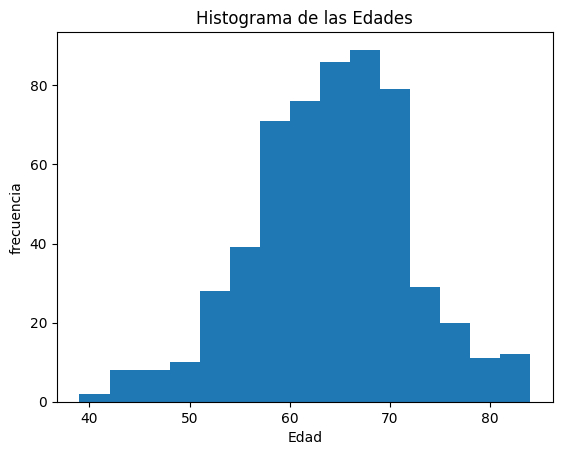

In [108]:
# Crea un histograma de la variable EDAD
plt.hist(df["Edad"],bins=15)
plt.xlabel("Edad")
plt.ylabel("frecuencia")
plt.title("Histograma de las Edades")

Text(0.5, 1.0, 'Histograma de la Cantidad de Muestras Tomadas')

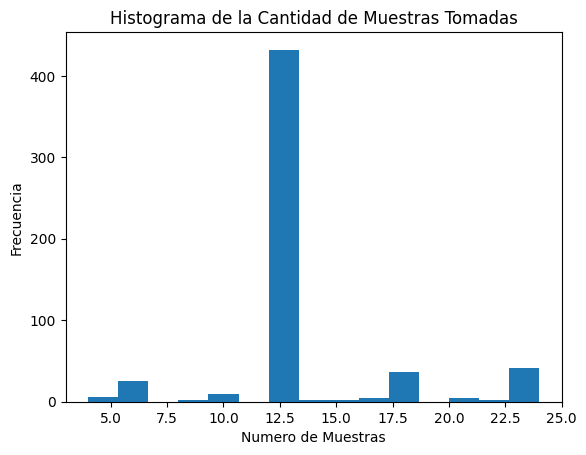

In [109]:
# Crea un histograma de la variable NUMERO DE MUESTRAS TOMADAS
plt.hist(df["Nro_muestras"],bins=15)
plt.xlabel("Numero de Muestras")
plt.ylabel("Frecuencia")
plt.title("Histograma de la Cantidad de Muestras Tomadas")

Text(0.5, 1.0, 'Histograma de la Cantidad días Hospitalizado MQ')

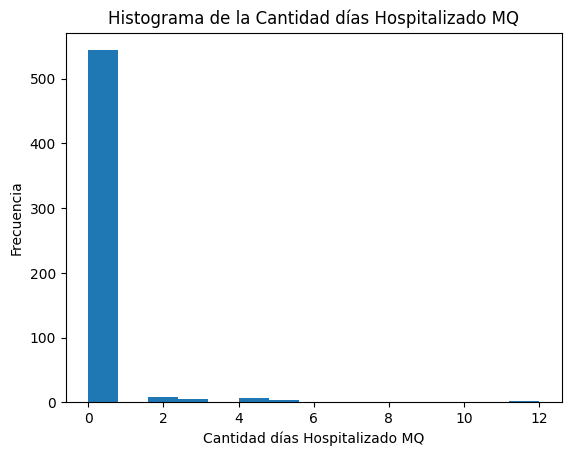

In [110]:
# Crea un histograma de la variable DIAS HOSPITALIZADOS MQ
plt.hist(df["Dias_hosp_mq"],bins=15)
plt.xlabel("Cantidad días Hospitalizado MQ")
plt.ylabel("Frecuencia")
plt.title("Histograma de la Cantidad días Hospitalizado MQ")

Text(0.5, 1.0, 'Histograma de la Cantidad días Hospitalizado UPC')

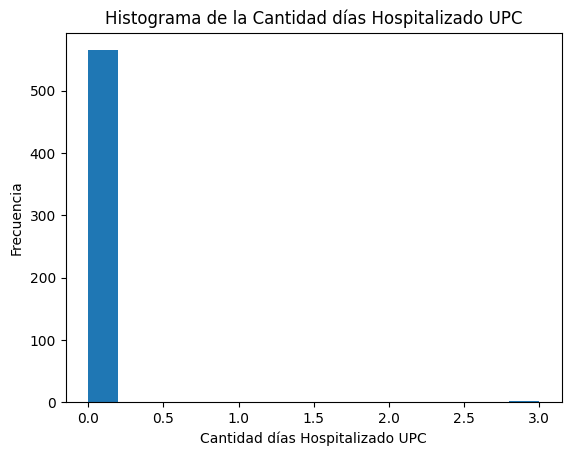

In [111]:
# # Crea un histograma de la variable DIAS HOSPITALIZADOS UPC
plt.hist(df["Dias_hosp_upc"],bins=15)
plt.xlabel("Cantidad días Hospitalizado UPC")
plt.ylabel("Frecuencia")
plt.title("Histograma de la Cantidad días Hospitalizado UPC")

+ Boxplot de variables numéricas

<Axes: >

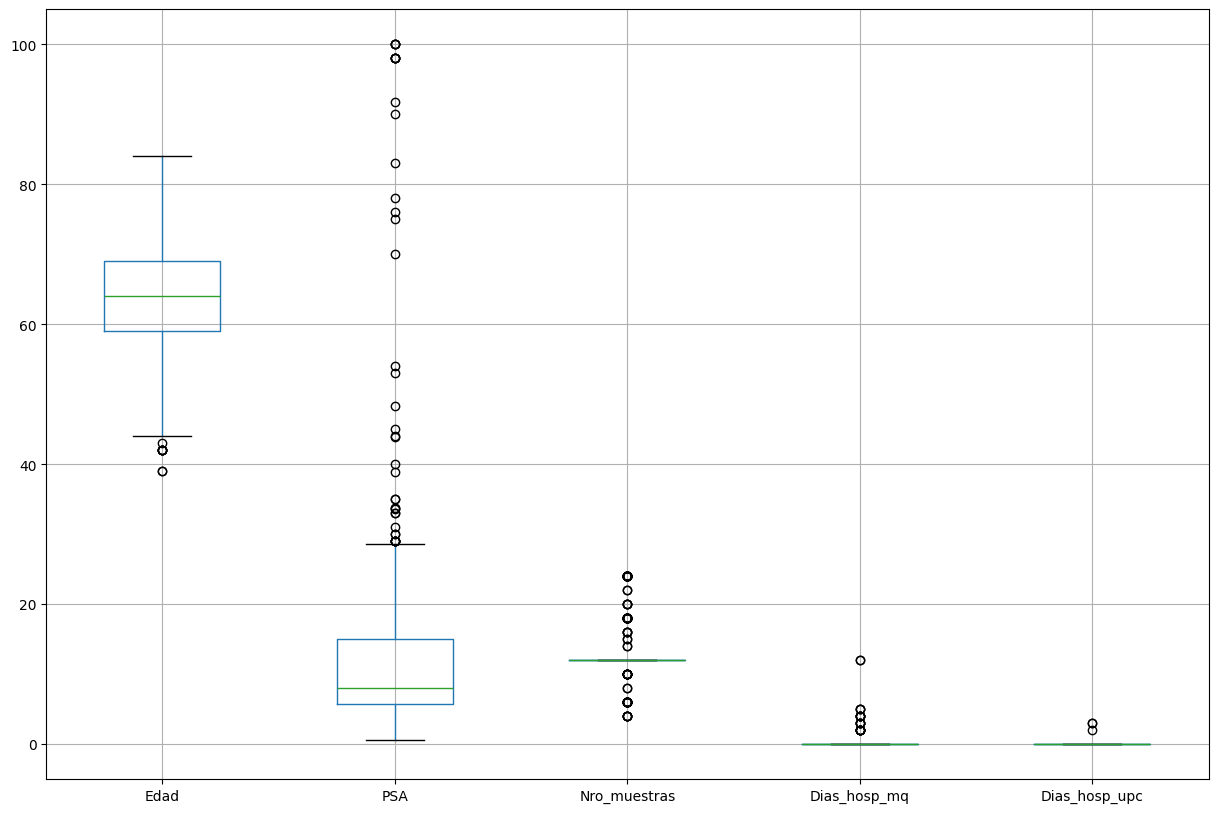

In [112]:
df.boxplot(figsize=(15, 10))


+ Distribución de variables categóricas

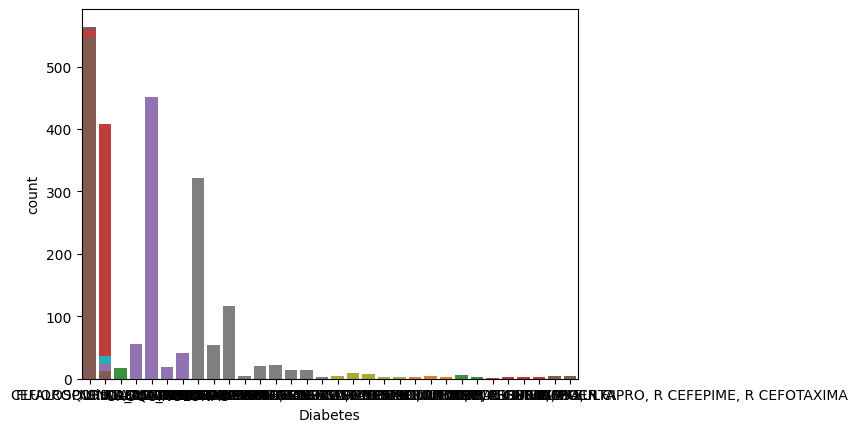

In [113]:
for col in df.select_dtypes(include=['object', 'category']):
    sns.countplot(x=col, data=df)